<a href="https://colab.research.google.com/github/DQN-Labs/school-cheating-ai-using-cv/blob/main/school_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense



In [2]:
#conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
#fully connected layers
model.add(Flatten())

model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=2))



In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,259,586 (4.80 MB)

 Trainable params: 1,259,586 (4.80 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_set = train_datagen.flow_from_directory(
        'new_data_copy',
        target_size=(150, 150),
        class_mode='categorical')

Found 263 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory(
        '/workspaces/school-cheating-ai-using-cv/testing _images',
        target_size=(150, 150),
        class_mode='categorical')

Found 1 images belonging to 1 classes.


In [13]:
model.fit(train_set,epochs=50,validation_data=test_set)


Epoch 1/50


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-12 11:54:33.175784: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179437568 exceeds 10% of free system memory.
2024-11-12 11:54:33.326589: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-11-12 11:54:33.355873: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2024-11-12 11:54:33.591744: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29297664 exceeds 10% of free system memory.
2024-11-12 11:54:3

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8794 - loss: 1.8301  

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

In [10]:
model.save("version_0-6.keras")

In [11]:
import keras
keras.saving.load_model("version_0-5.keras")

<Sequential name=sequential, built=True>

# Interpretation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
CHEATER DETECTED!


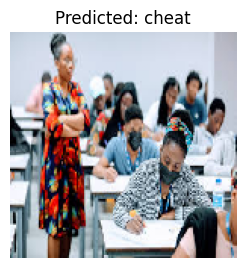

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import keras



model = keras.saving.load_model('version_0-5.keras')


class_indices = {
    0: 'cheat',
    1: 'not cheat'
}

# Function to visualize predictions
def visualize_predictions(image_paths):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths):
        test_image = image.load_img(img_path, target_size=(150, 150))
        test_image = image.img_to_array(test_image) / 255.0  
        test_image = np.expand_dims(test_image, axis=0)

        result = model.predict(test_image)
        predicted_index = np.argmax(result)
        if predicted_index == 0:
            print("CHEATER DETECTED!")
        
        plt.subplot(3, 3, i + 1)  
        plt.imshow(test_image[0])
        plt.title(f'Predicted: {class_indices[predicted_index]}')
        plt.axis('off')
    plt.show()


image_paths = [
'/workspaces/school-cheating-ai-using-cv/testing _images/test_1.jfif',




]

visualize_predictions(image_paths)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
Prediction for /workspaces/school-cheating-ai-using-cv/high-angle-kid-cheating-school-test.jpg: not cheat with confidence 0.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction for /workspaces/school-cheating-ai-using-cv/cheating images for ai/cheating 2.jpg: cheat with confidence 0.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for /workspaces/school-cheating-ai-using-cv/testing _images/not_cheat/test_9.jfif: not cheat with confidence 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for /workspaces/school-cheating-ai-using-cv/testing _images/not_cheat/test_4.jfif: not cheat with confidence 0.88
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for /workspaces/school-cheating-ai-using-cv/cheating images for ai/cheating 9.jpg: cheat (Confidence: 0.56) - BELOW THRESHOLD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for /workspaces/school-cheating-ai-using-cv/cheating images for ai/cheating 3.jpg: cheat with confidence 0.97
1/1 ━━━━━━━━━━━

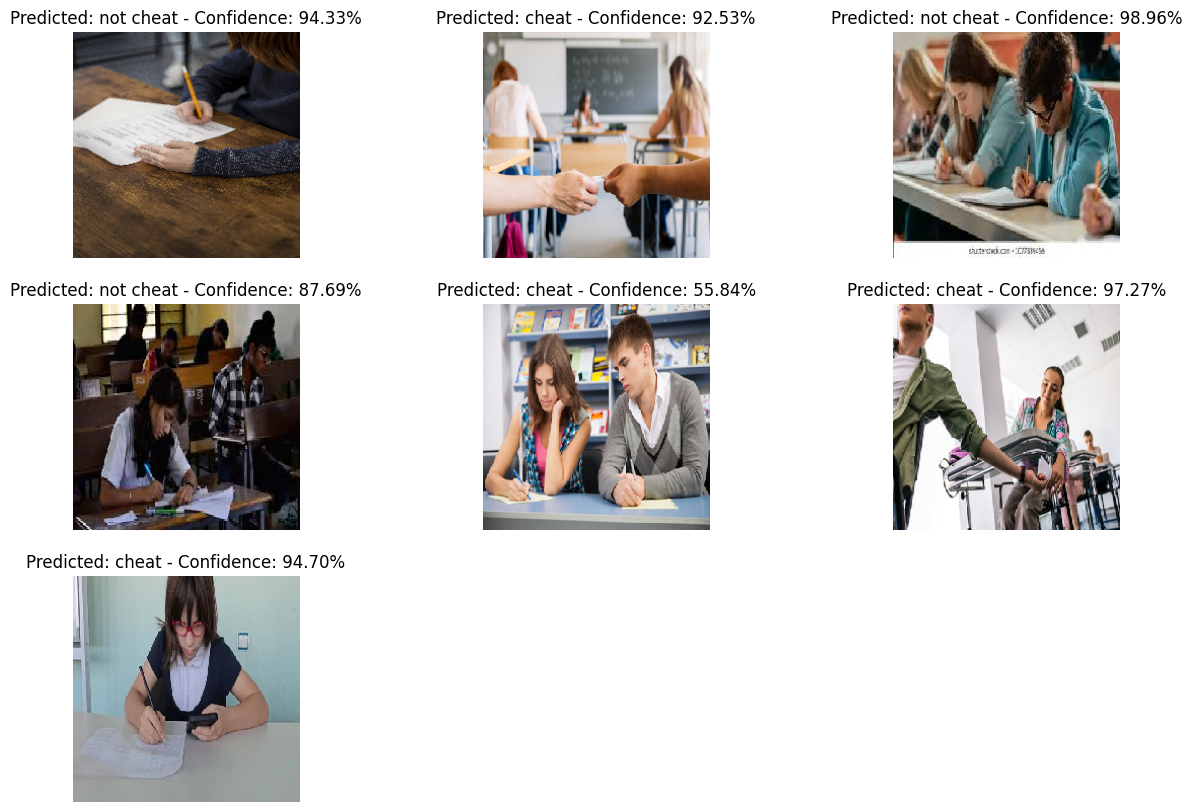

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import keras

# Load the trained model
model = keras.saving.load_model('image_classification_model.h5')  # Update with your model's path

# Class indices for interpreting the prediction
class_indices = {
    0: 'cheat',
    1: 'not cheat'
}

# Confidence threshold
confidence_threshold = 0.85  # 85%

def visualize_predictions(image_paths):
    plt.figure(figsize=(15, 10))  # Set the size of the plot
    for i, img_path in enumerate(image_paths):
        # Load and preprocess the image
        test_image = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
        test_image = image.img_to_array(test_image) / 255.0  # Normalize the image
        test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
        
        # Make prediction
        result = model.predict(test_image)
        predicted_index = np.argmax(result)  # Index of the highest confidence value
        confidence = result[0][predicted_index]  # Confidence level for the predicted class
        
        # Check if the prediction's confidence is above the threshold
        if confidence >= confidence_threshold:
            print(f"Prediction for {img_path}: {class_indices[predicted_index]} with confidence {confidence:.2f}")
        else:
            print(f"Prediction for {img_path}: {class_indices[predicted_index]} (Confidence: {confidence:.2f}) - BELOW THRESHOLD")
        
        # Display the image and predicted label with confidence
        plt.subplot(3, 3, i + 1)  # Adjust grid size based on the number of images
        plt.imshow(test_image[0])
        plt.title(f'Predicted: {class_indices[predicted_index]} - Confidence: {confidence*100:.2f}%')
        plt.axis('off')  # Hide axis for cleaner display
    
    plt.show()  # Display the plot with all images

# List of image paths to test
image_paths = [
    '/workspaces/school-cheating-ai-using-cv/high-angle-kid-cheating-school-test.jpg',
    '/workspaces/school-cheating-ai-using-cv/cheating images for ai/cheating 2.jpg',
    '/workspaces/school-cheating-ai-using-cv/testing _images/not_cheat/test_9.jfif',
    '/workspaces/school-cheating-ai-using-cv/testing _images/not_cheat/test_4.jfif',
    '/workspaces/school-cheating-ai-using-cv/cheating images for ai/cheating 9.jpg',
    '/workspaces/school-cheating-ai-using-cv/cheating images for ai/cheating 3.jpg',
    '/workspaces/school-cheating-ai-using-cv/1.jpg.webp'
]

# Call the function to visualize predictions
visualize_predictions(image_paths)
